In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [114]:
# Generate batches of tensor image data with real-time data augmentation.
datagen = ImageDataGenerator(rescale=1./255)

training_set=datagen.flow_from_directory(r"E:\ml1\train",
                                                target_size=(64,64), 
                                               batch_size=100,
                                               class_mode = 'categorical')
test_set=datagen.flow_from_directory(r"E:\ml1\test",
                                                target_size=(64,64), 
                                               batch_size=100,
                                               class_mode = 'categorical')
# class_mode='categorical' if you have more than 2 classses

Found 1797 images belonging to 6 classes.
Found 581 images belonging to 6 classes.


In [115]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 12, 12, 128)     

In [116]:
from tensorflow.keras.callbacks import EarlyStopping

In [117]:
early_stopping= EarlyStopping(monitor='accuracy',patience =3)

In [118]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


# model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [119]:
model.fit(training_set, epochs=30, validation_data=test_set,callbacks=[early_stopping])

Epoch 1/30
18/18 [==============================] - 15s 770ms/step - loss: 1.5746 - accuracy: 0.3389 - val_loss: 1.3119 - val_accuracy: 0.5284
Epoch 2/30
18/18 [==============================] - 13s 740ms/step - loss: 0.9419 - accuracy: 0.6717 - val_loss: 1.3062 - val_accuracy: 0.5749
Epoch 3/30
18/18 [==============================] - 13s 719ms/step - loss: 0.6914 - accuracy: 0.7596 - val_loss: 1.1195 - val_accuracy: 0.6317
Epoch 4/30
18/18 [==============================] - 13s 736ms/step - loss: 0.5428 - accuracy: 0.8136 - val_loss: 1.1891 - val_accuracy: 0.6403
Epoch 5/30
18/18 [==============================] - 13s 739ms/step - loss: 0.4243 - accuracy: 0.8570 - val_loss: 1.1265 - val_accuracy: 0.6575
Epoch 6/30
18/18 [==============================] - 13s 727ms/step - loss: 0.3675 - accuracy: 0.8720 - val_loss: 0.7347 - val_accuracy: 0.7659
Epoch 7/30
18/18 [==============================] - 13s 708ms/step - loss: 0.2868 - accuracy: 0.8976 - val_loss: 1.0468 - val_accuracy: 0.6885

In [120]:
from tensorflow.keras.preprocessing import image

(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 64ms/step


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

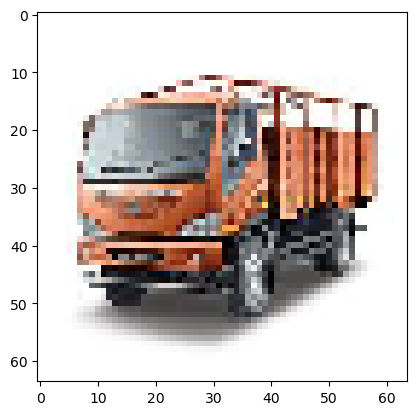

In [121]:
img = image.load_img(r"E:\ml\Test set\Heavy\images (55).jpg"
                    ,target_size = (64,64))
plt.imshow(img);
test_img = np.asarray(img)
print(test_img.shape)
# reshape to add 1 row
test_img = test_img.reshape(1,64,64,3)
print(test_img.shape)
model.predict(test_img)

In [112]:
training_set.class_indices

{'bike': 0, 'bus': 1, 'cycle': 2, 'sedan': 3, 'suv': 4, 'truck': 5}

(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 21ms/step


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

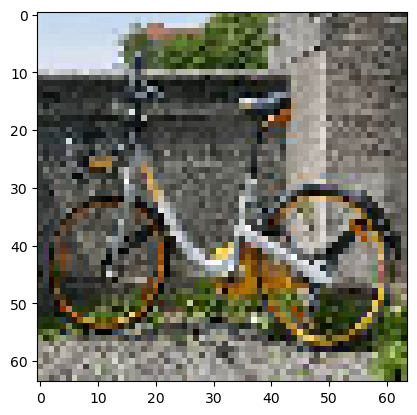

In [135]:
img = image.load_img(r"E:\ml\th.jpg"
                    ,target_size = (64,64))
plt.imshow(img);
test_img = np.asarray(img)
print(test_img.shape)
# reshape to add 1 row
test_img = test_img.reshape(1,64,64,3)
print(test_img.shape)
model.predict(test_img)

In [136]:
model.save("vehicleclassifier.h5")